### Step 1: Import relevant libraries

In [2]:
#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib



### Step 2: Set up current working directory

In [3]:
os.chdir(r"C:/Users/tleer/Python Projects/GitHub Projects/Student Prediction/Data")

In [4]:
os.getcwd()

'C:\\Users\\tleer\\Python Projects\\GitHub Projects\\Student Prediction\\Data'

In [5]:
path = "C:/Users/tleer/Python Projects/GitHub Projects/Student Prediction/"

### Step 3: Import the dataset

In [6]:
df2 = pd.read_excel(f'{path}/Data/data_science_candidate_score_file.xlsx')

In [9]:
df1 = pd.read_excel(f'{path}/Data/data_science_candidate_data_file.xlsx')

# Target Variable.
df1["pass_fail_drop_bin_micro"] = np.where(df1["pass_fail_drop_bin_micro"]=='Pass',1,0)


#df1 = df1.iloc[:,1:]
df1 = df1.drop('num_grade_micro',axis=1)
df1['StudentID'] = df1['StudentID'].astype(str)


df1 = df1[~(df1['time_between_last_class_and_micro']==-1)]
df1 = df1[df1["total_avg"]<=100]
df1 = df1[~(df1["total_avg"].isnull())]

### Step 4: Evaluate Data Structure

In [10]:
df1.head()

,StudentID,pass_fail_drop_bin_micro,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
0,1,1,72.9500,4.0,2.0,83.825000,3.0,62.075,21.750000,1.0,NaN
1,2,1,90.5000,0.0,2.0,92.240000,3.0,87.600,4.640000,0.0,NaN
2,3,0,79.0500,1.0,3.0,83.666667,3.0,69.850,13.816667,0.0,NaN
3,4,1,92.4375,0.0,2.0,91.625000,3.0,93.250,-1.625000,0.0,NaN
4,5,0,88.3800,0.0,1.0,88.380000,3.0,NaN,NaN,1.0,NaN


In [11]:
df1.shape

(2627, 11)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 0 to 2629
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   StudentID                          2627 non-null   object 
 1   pass_fail_drop_bin_micro           2627 non-null   int32  
 2   total_avg                          2627 non-null   float64
 3   failed_courses                     2627 non-null   float64
 4   terms_at_galen                     2627 non-null   float64
 5   prev_sem_avg                       2627 non-null   float64
 6   time_between_last_class_and_micro  2627 non-null   float64
 7   two_sem_prior_avg                  1757 non-null   float64
 8   semester_diff                      1757 non-null   float64
 9   transfer_student                   2627 non-null   float64
 10  TEAS                               469 non-null    float64
dtypes: float64(9), int32(1), object(1)
memory usage: 236.0+ KB


In [13]:
df1.describe()

,pass_fail_drop_bin_micro,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,1757.000000,1757.000000,2627.000000,469.000000
mean,0.775029,87.509846,0.319376,2.290826,86.593003,3.866768,87.144447,-1.887385,0.260373,68.338230
std,0.417643,5.614232,0.795801,1.650291,6.721038,2.760659,7.027861,7.264193,0.438922,8.698847
min,0.000000,49.833333,0.000000,1.000000,26.850000,3.000000,31.550000,-48.260000,0.000000,33.600000
25%,1.000000,84.031250,0.000000,1.000000,82.970833,3.000000,83.878000,-5.100000,0.000000,62.340000
50%,1.000000,87.943636,0.000000,2.000000,87.250000,3.000000,88.220000,-1.926000,0.000000,67.560000
75%,1.000000,91.652273,0.000000,3.000000,91.200000,3.000000,91.880000,1.145000,1.000000,73.800000
max,1.000000,99.195000,7.000000,13.000000,99.195000,45.000000,99.597500,47.350000,1.000000,96.330000


In [14]:
df1.isna().any()

StudentID                            False
pass_fail_drop_bin_micro             False
total_avg                            False
failed_courses                       False
terms_at_galen                       False
prev_sem_avg                         False
time_between_last_class_and_micro    False
two_sem_prior_avg                     True
semester_diff                         True
transfer_student                     False
TEAS                                  True
dtype: bool

In [15]:
# Number of unique values per variable
df1.nunique()

StudentID                            2627
pass_fail_drop_bin_micro                2
total_avg                            2117
failed_courses                          8
terms_at_galen                         13
prev_sem_avg                         1654
time_between_last_class_and_micro      13
two_sem_prior_avg                    1421
semester_diff                        1510
transfer_student                        2
TEAS                                  284
dtype: int64

In [26]:
## Used to Resolve Null Values

df1['two_sem_prior_avg_test']=df1['two_sem_prior_avg'].fillna(df1['two_sem_prior_avg'].mean())
df1['semester_diff_test']=df1['prev_sem_avg'] - df1['two_sem_prior_avg_test']
#df1['semester_diff_test']=np.where(df1['semester_diff'].isna(),0,df1['prev_sem_avg'] - df1['two_sem_prior_avg_test'])
df1['teas_test']=np.where(df1['TEAS'].isna(),0,1)

### Step 5: Check Variable Distribution Visually

In [17]:
cat_list = df1.select_dtypes(include=object).columns.tolist()
num_list = df1.select_dtypes(include=np.number).columns.tolist()

In [18]:
num_list

['pass_fail_drop_bin_micro',
 'total_avg',
 'failed_courses',
 'terms_at_galen',
 'prev_sem_avg',
 'time_between_last_class_and_micro',
 'two_sem_prior_avg',
 'semester_diff',
 'transfer_student',
 'TEAS']

In [19]:
cat_list

['StudentID']

In [20]:
dataset_num = df1[num_list]
dataset_cat = df1[cat_list]

In [21]:
print(len(cat_list))
print(len(num_list))

1
10


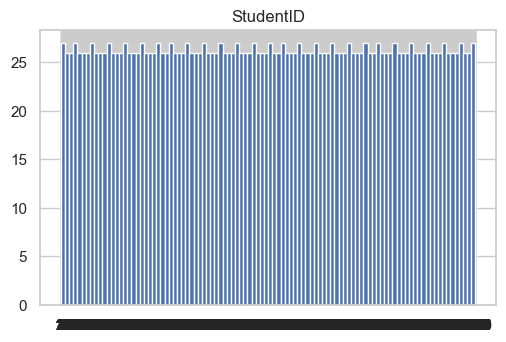

In [23]:
## Visuals for Normal Categorical and Object Variables

import seaborn as sns
sns.set(style="whitegrid")  
fig = plt.figure(figsize=(20, 25))

for i in range(dataset_cat.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset_cat.columns.values[i])
    
    vals = np.size(dataset_cat.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset_cat.iloc[:,i], bins=vals)

#sns.countplot(x="Contract", data=dataset, ax=axs[0, 0])


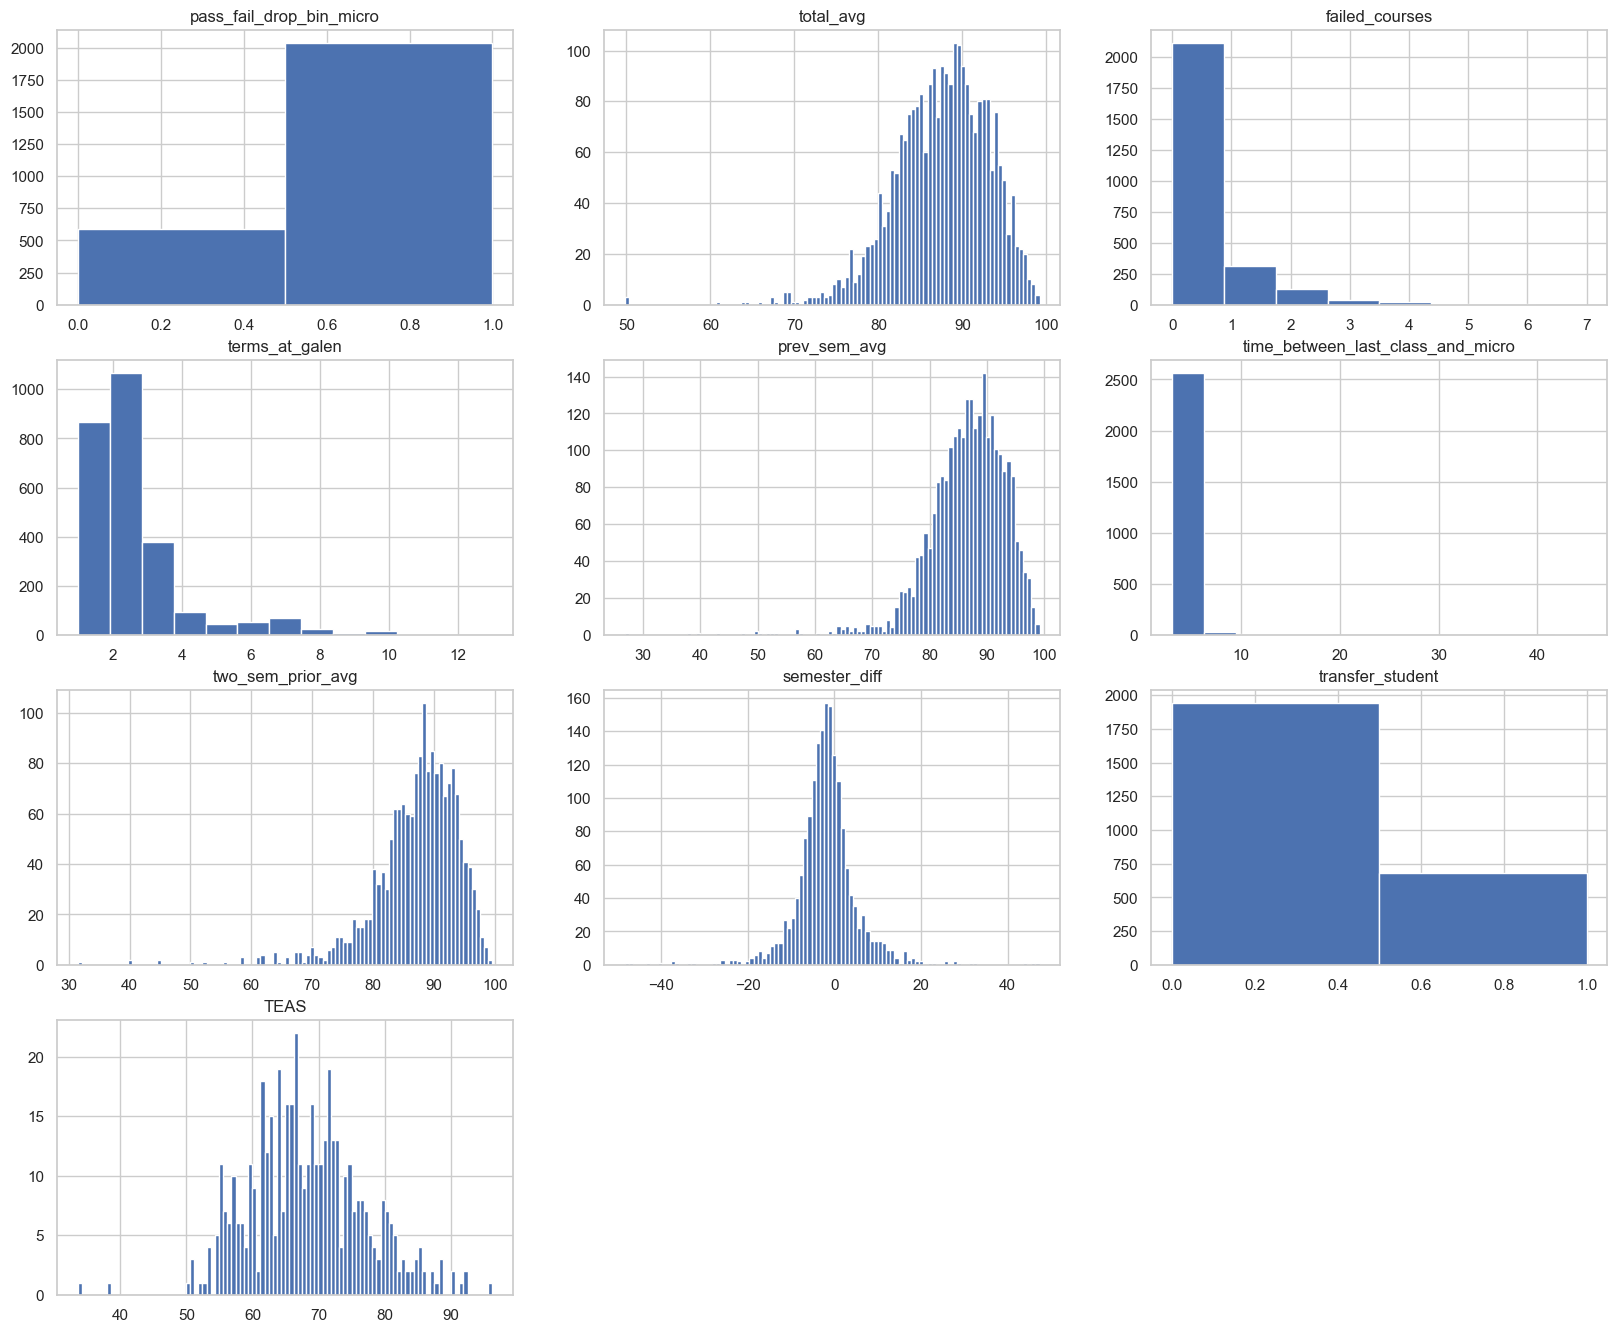

In [24]:
## Visuals for Numeric Variables to see their distribution

import seaborn as sns
sns.set(style="whitegrid")  
fig = plt.figure(figsize=(20, 25))

for i in range(dataset_num.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset_num.columns.values[i])
    
    vals = np.size(dataset_num.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset_num.iloc[:,i], bins=vals)

#sns.countplot(x="Contract", data=dataset, ax=axs[0, 0])


### Step 6: Check for Multicollinearity

Most Positive Correlations: 
 total_avg                 0.388791
prev_sem_avg              0.313807
two_sem_prior_avg_test    0.249339
semester_diff_test        0.096170
dtype: float64

Most Negative Correlations: 
 time_between_last_class_and_micro   -0.012135
terms_at_galen                      -0.018853
transfer_student                    -0.031409
teas_test                           -0.060675
failed_courses                      -0.205377
dtype: float64



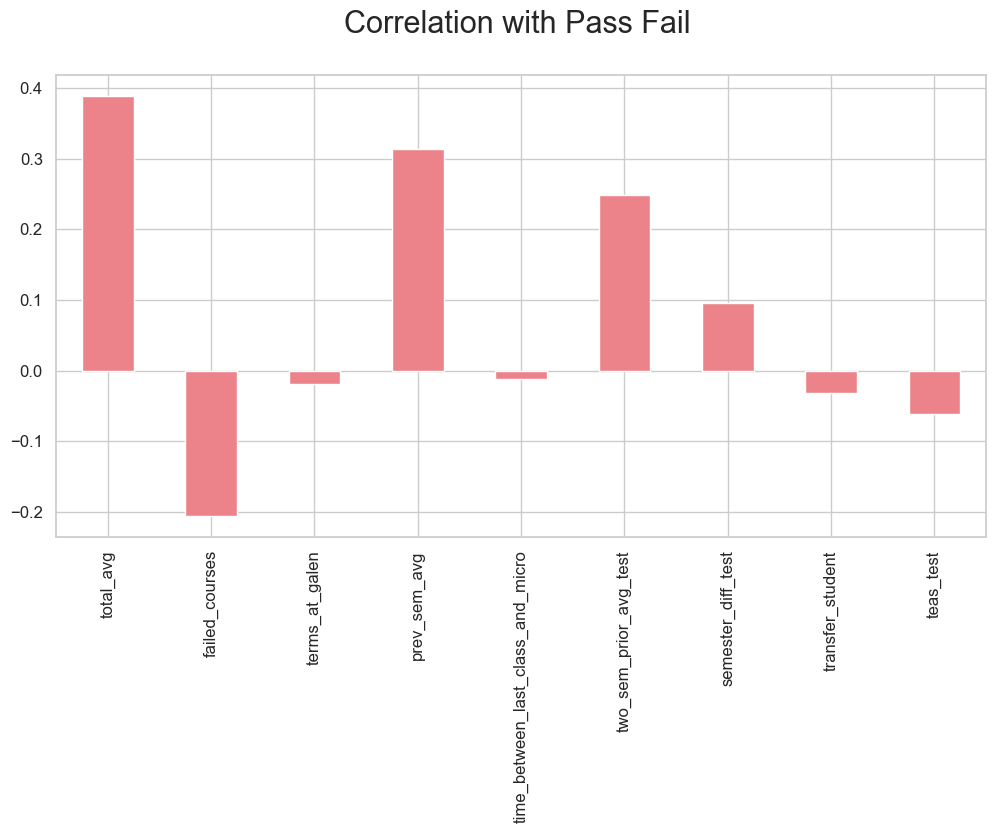

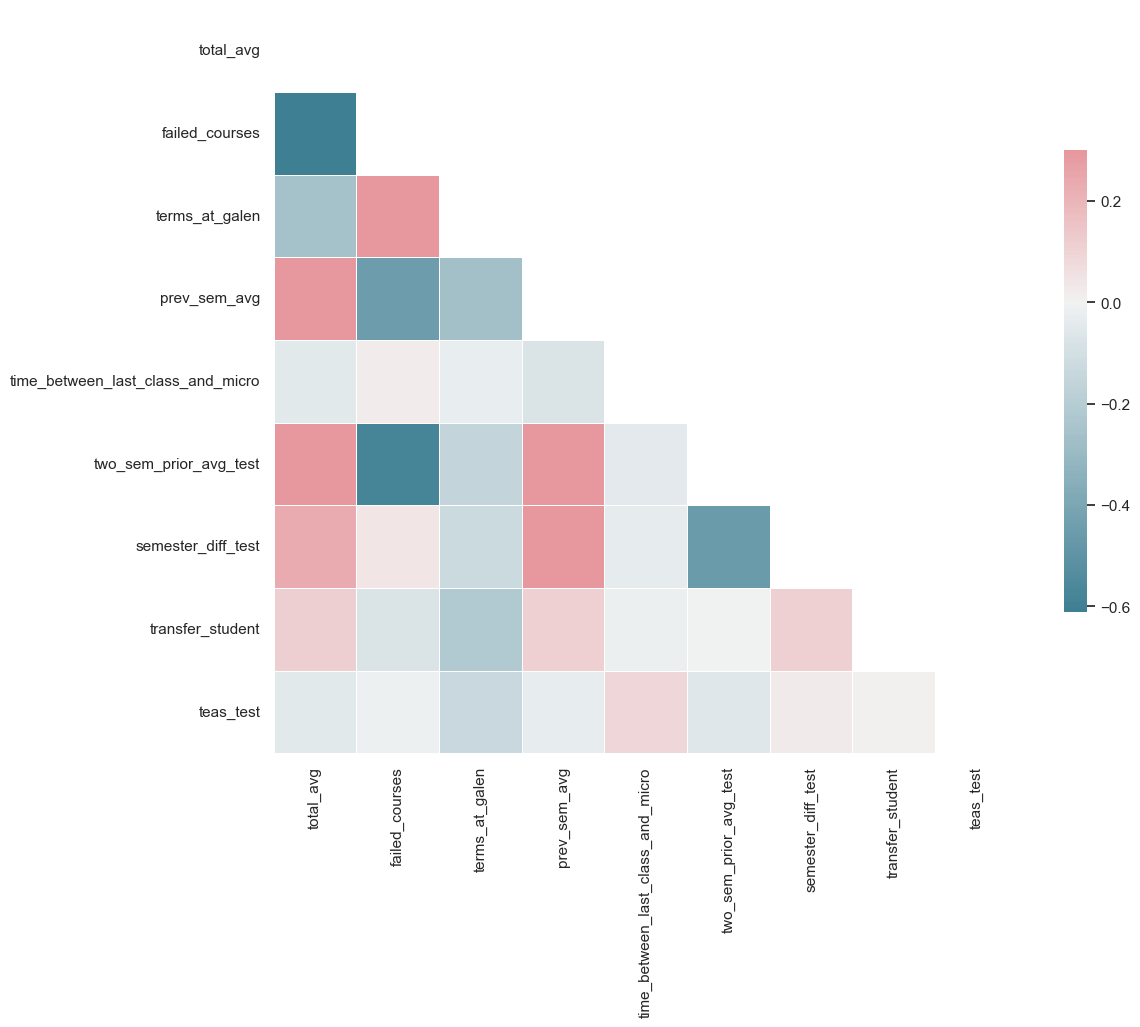


                           variables          VIF
0                          total_avg  1063.612390
1                     failed_courses     1.399075
2                     terms_at_galen     3.602430
3                       prev_sem_avg  1053.683044
4  time_between_last_class_and_micro     2.946573
5                   transfer_student     1.441493
6                 semester_diff_test     2.377594



In [27]:


dataset2 = df1[['total_avg', 'failed_courses', 'terms_at_galen',
       'prev_sem_avg', 'time_between_last_class_and_micro', 'two_sem_prior_avg_test',
        'semester_diff_test', 'transfer_student','teas_test']]



correlations = dataset2.corrwith(df1.pass_fail_drop_bin_micro)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)
print('')
correlations.plot.bar(
        figsize = (12, 6), fontsize = 12, color = '#ec838a',
        rot = 90, grid = True)

plt.title('Correlation with Pass Fail \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

print('')
## Set and compute the Correlation Matrix
sns.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

print("")
def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

dataset2 = df1[[
                'total_avg', 
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff_test'
               #,'teas_test'
               ]]

#1. Can't have all the GPAs in one area as they are highly correlated with each other. 
# total_avg seems to be their cumulative GPA, prev_sem_avg/two_sem_prior_avg are previous 
#semester's GPA so of course there's correlation here.

#dataset2 = df1[['total_avg', 'failed_courses', 'terms_at_galen',
#       'prev_sem_avg', 'time_between_last_class_and_micro', 'two_sem_prior_avg',
#        'semester_diff', 'transfer_student','TEAS']]
print(calc_vif(dataset2))
print("")

                           variables       VIF
0                     failed_courses  1.415915
1                     terms_at_galen  3.595934
2                       prev_sem_avg  5.799533
3  time_between_last_class_and_micro  2.961245
4                   transfer_student  1.428012
5                 semester_diff_test  1.085548
6                          teas_test  1.245864



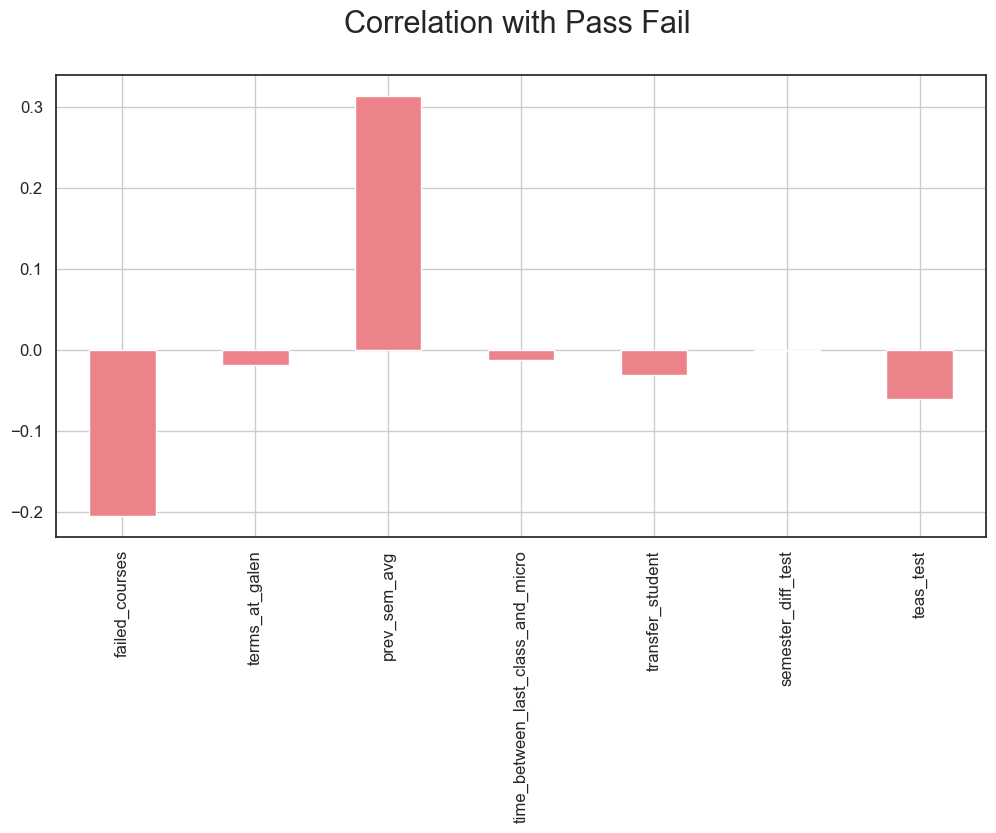

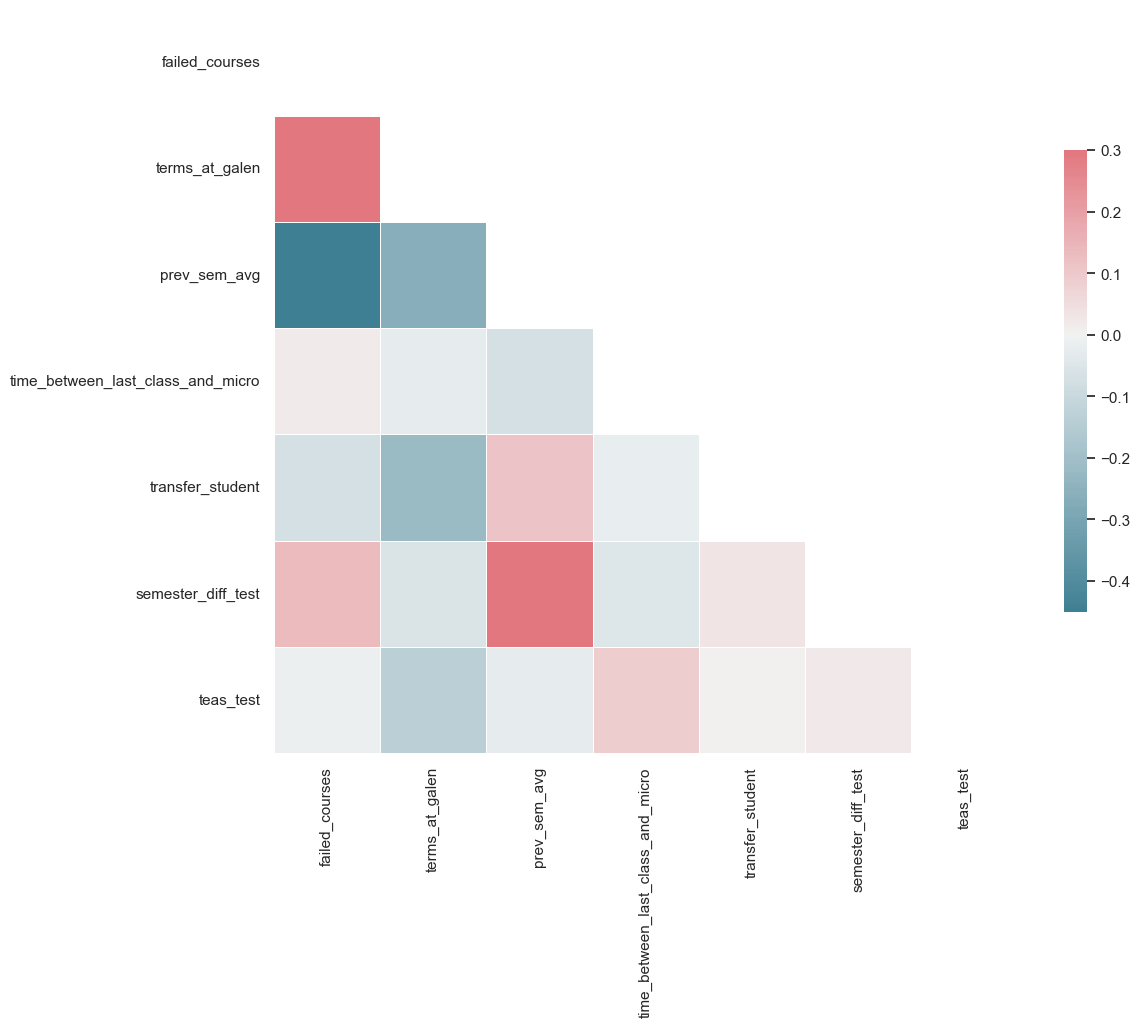

In [28]:
#df1['two_sem_prior_avg_test']=df1['two_sem_prior_avg'].fillna(df1['two_sem_prior_avg'].mean())
#df1['semester_diff_test']=df1['prev_sem_avg'] - df1['two_sem_prior_avg_test']
df1['semester_diff_test']=np.where(df1['semester_diff'].isna(),0,df1['prev_sem_avg'] - df1['two_sem_prior_avg'])
df1['teas_test']=np.where(df1['TEAS'].isna(),0,1)

def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

dataset2 = df1[[
                #'total_avg', 
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff_test'
               ,'teas_test'
               ]]

#1. Can't have all the GPAs in one area as they are highly correlated with each other. 
# total_avg seems to be their cumulative GPA, prev_sem_avg/two_sem_prior_avg are previous 
#semester's GPA so of course there's correlation here.

#dataset2 = df1[['total_avg', 'failed_courses', 'terms_at_galen',
#       'prev_sem_avg', 'time_between_last_class_and_micro', 'two_sem_prior_avg',
#        'semester_diff', 'transfer_student','TEAS']]
print(calc_vif(dataset2))
print("")

correlations = dataset2.corrwith(df1.pass_fail_drop_bin_micro)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (12, 6), fontsize = 12, color = '#ec838a',
        rot = 90, grid = True)

plt.title('Correlation with Pass Fail \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

print("")
## Set and compute the Correlation Matrix
sns.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

### Step 7: Value Counts of Variables Post-Multicollinearity

In [29]:
#df1['teas_test']=np.where(df1['TEAS'].isna(),0,1)

df2 = df1[[
                #'total_avg',
                'StudentID',
               'pass_fail_drop_bin_micro',
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff'
               ,'TEAS'

            ]]

In [30]:
#print(df1["failed_courses"].describe())
print(" ")
print(df1["pass_fail_drop_bin_micro"].value_counts())
print(" ")
print(df1["pass_fail_drop_bin_micro"].value_counts(normalize=True))
print(" ")
#df1["failed_courses"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["failed_courses"].describe())
print(" ")
print(df1["failed_courses"].value_counts())
print(" ")
print(df1["failed_courses"].value_counts(normalize=True))
print(" ")
#df1["failed_courses"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["terms_at_galen"].describe())
print(" ")
print(df1["terms_at_galen"].value_counts())
print(" ")
print(df1["terms_at_galen"].value_counts(normalize=True))
print(" ")
#df1["terms_at_galen"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["prev_sem_avg"].describe())
print(" ")
print(df1["prev_sem_avg"].value_counts())
print(" ")
print(df1["prev_sem_avg"].value_counts(normalize=True))
print(" ")
#df1["prev_sem_avg"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["time_between_last_class_and_micro"].describe())
print(" ")
print(df1["time_between_last_class_and_micro"].value_counts())
print(" ")
print(df1["time_between_last_class_and_micro"].value_counts(normalize=True))
print(" ")
#df1["time_between_last_class_and_micro"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["transfer_student"].describe())
print(" ")
print(df1["transfer_student"].value_counts())
print(" ")
print(df1["transfer_student"].value_counts(normalize=True))
print(" ")
#df1["transfer_student"].value_counts().plot(kind="bar")
#plt.show()
print(" ")


#print(df1["semester_diff"].describe())
print(" ")
print(df1["semester_diff"].value_counts())
print(" ")
print(df1["semester_diff"].value_counts(normalize=True))
print(" ")
#df1["transfer_student"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["TEAS"].describe())
print(" ")
print(df1["TEAS"].value_counts())
print(" ")
print(df1["TEAS"].value_counts(normalize=True))
print(" ")
#df1["transfer_student"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(" ")
#print(df1["failed_courses_2"].describe())
#print(" ")
#print(df1["failed_courses_2"].value_counts())
#print(" ")
#print(df1["failed_courses_2"].value_counts(normalize=True))
#print(" ")
#df1["failed_courses_2"].value_counts().plot(kind="bar")
#plt.show()
#print(" ")

 
pass_fail_drop_bin_micro
1    2036
0     591
Name: count, dtype: int64
 
pass_fail_drop_bin_micro
1    0.775029
0    0.224971
Name: proportion, dtype: float64
 
 
 
failed_courses
0.0    2116
1.0     312
2.0     127
3.0      38
4.0      19
5.0       8
6.0       6
7.0       1
Name: count, dtype: int64
 
failed_courses
0.0    0.805482
1.0    0.118767
2.0    0.048344
3.0    0.014465
4.0    0.007233
5.0    0.003045
6.0    0.002284
7.0    0.000381
Name: proportion, dtype: float64
 
 
 
terms_at_galen
2.0     1067
1.0      869
3.0      378
4.0       94
7.0       68
6.0       51
5.0       46
8.0       23
10.0      17
9.0        9
11.0       3
12.0       1
13.0       1
Name: count, dtype: int64
 
terms_at_galen
2.0     0.406167
1.0     0.330796
3.0     0.143890
4.0     0.035782
7.0     0.025885
6.0     0.019414
5.0     0.017510
8.0     0.008755
10.0    0.006471
9.0     0.003426
11.0    0.001142
12.0    0.000381
13.0    0.000381
Name: proportion, dtype: float64
 
 
 
prev_sem_avg
82.500000   

In [31]:
## Changing Numerical Variables to Categorical Bins

df2["failed_courses_2"] = np.where(df2["failed_courses"].isnull(),"Not_Included",
                              np.where(df2["failed_courses"]==0,"Classes_Failed_0",
                              np.where(df2["failed_courses"]==1,"Classes_Failed_1","Classes_failed_2+"
                                      )))

df2["terms_at_galen_2"] = np.where(df2["terms_at_galen"].isnull(),"Not_Included",
                              np.where(df2["terms_at_galen"]==1,"Terms_At_Galen_1",
                              np.where(df2["terms_at_galen"]==2,"Terms_At_Galen_2",
                              np.where(df2["terms_at_galen"]==3,"Terms_At_Galen_3","Terms_At_Galen_4+"
                                      ))))


df2["prev_sem_avg_2"] = np.where(df2["prev_sem_avg"].isnull(),"Not_Included",
                              np.where(df2["prev_sem_avg"]<=65,"0-65",
                              np.where(df2["prev_sem_avg"]<=70,"66-70",
                              np.where(df2["prev_sem_avg"]<=80,"71-80",
                              np.where(df2["prev_sem_avg"]<=90,"81-90","91-100"
                                      )))))

df2["time_between_last_class_and_micro_2"] = np.where(df2["time_between_last_class_and_micro"].isnull(),"Not_Included",
                                                  np.where(df2["time_between_last_class_and_micro"]<=3,"0-3","4+"
                                                  ))


df2["semester_diff_2"] = np.where(df2["semester_diff"].isnull(),"No_Two_Semesters_Prior",
                              np.where(df2["semester_diff"]<=0,"Grade_Drop",
                              np.where(df2["semester_diff"]==0,"No_Grade_Change","Grade_Increase"                                 
                                      )))


df2["TEAS_2"] = np.where(df2["TEAS"].isnull(),0,1)


C:\Users\tleer\AppData\Local\Temp\ipykernel_3300\2110993013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["failed_courses_2"] = np.where(df2["failed_courses"].isnull(),"Not_Included",
C:\Users\tleer\AppData\Local\Temp\ipykernel_3300\2110993013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["terms_at_galen_2"] = np.where(df2["terms_at_galen"].isnull(),"Not_Included",
C:\Users\tleer\AppData\Local\Temp\ipykernel_3300\2110993013.py:15: SettingWithCopyWarning: 
A value is trying to be set on a

In [33]:
df2['pass_fail_drop_bin_micro'] = df2['pass_fail_drop_bin_micro'].astype(str)
df2['TEAS_2'] = df2['TEAS_2'].astype(str)

In [37]:
cat_list =  ['pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']

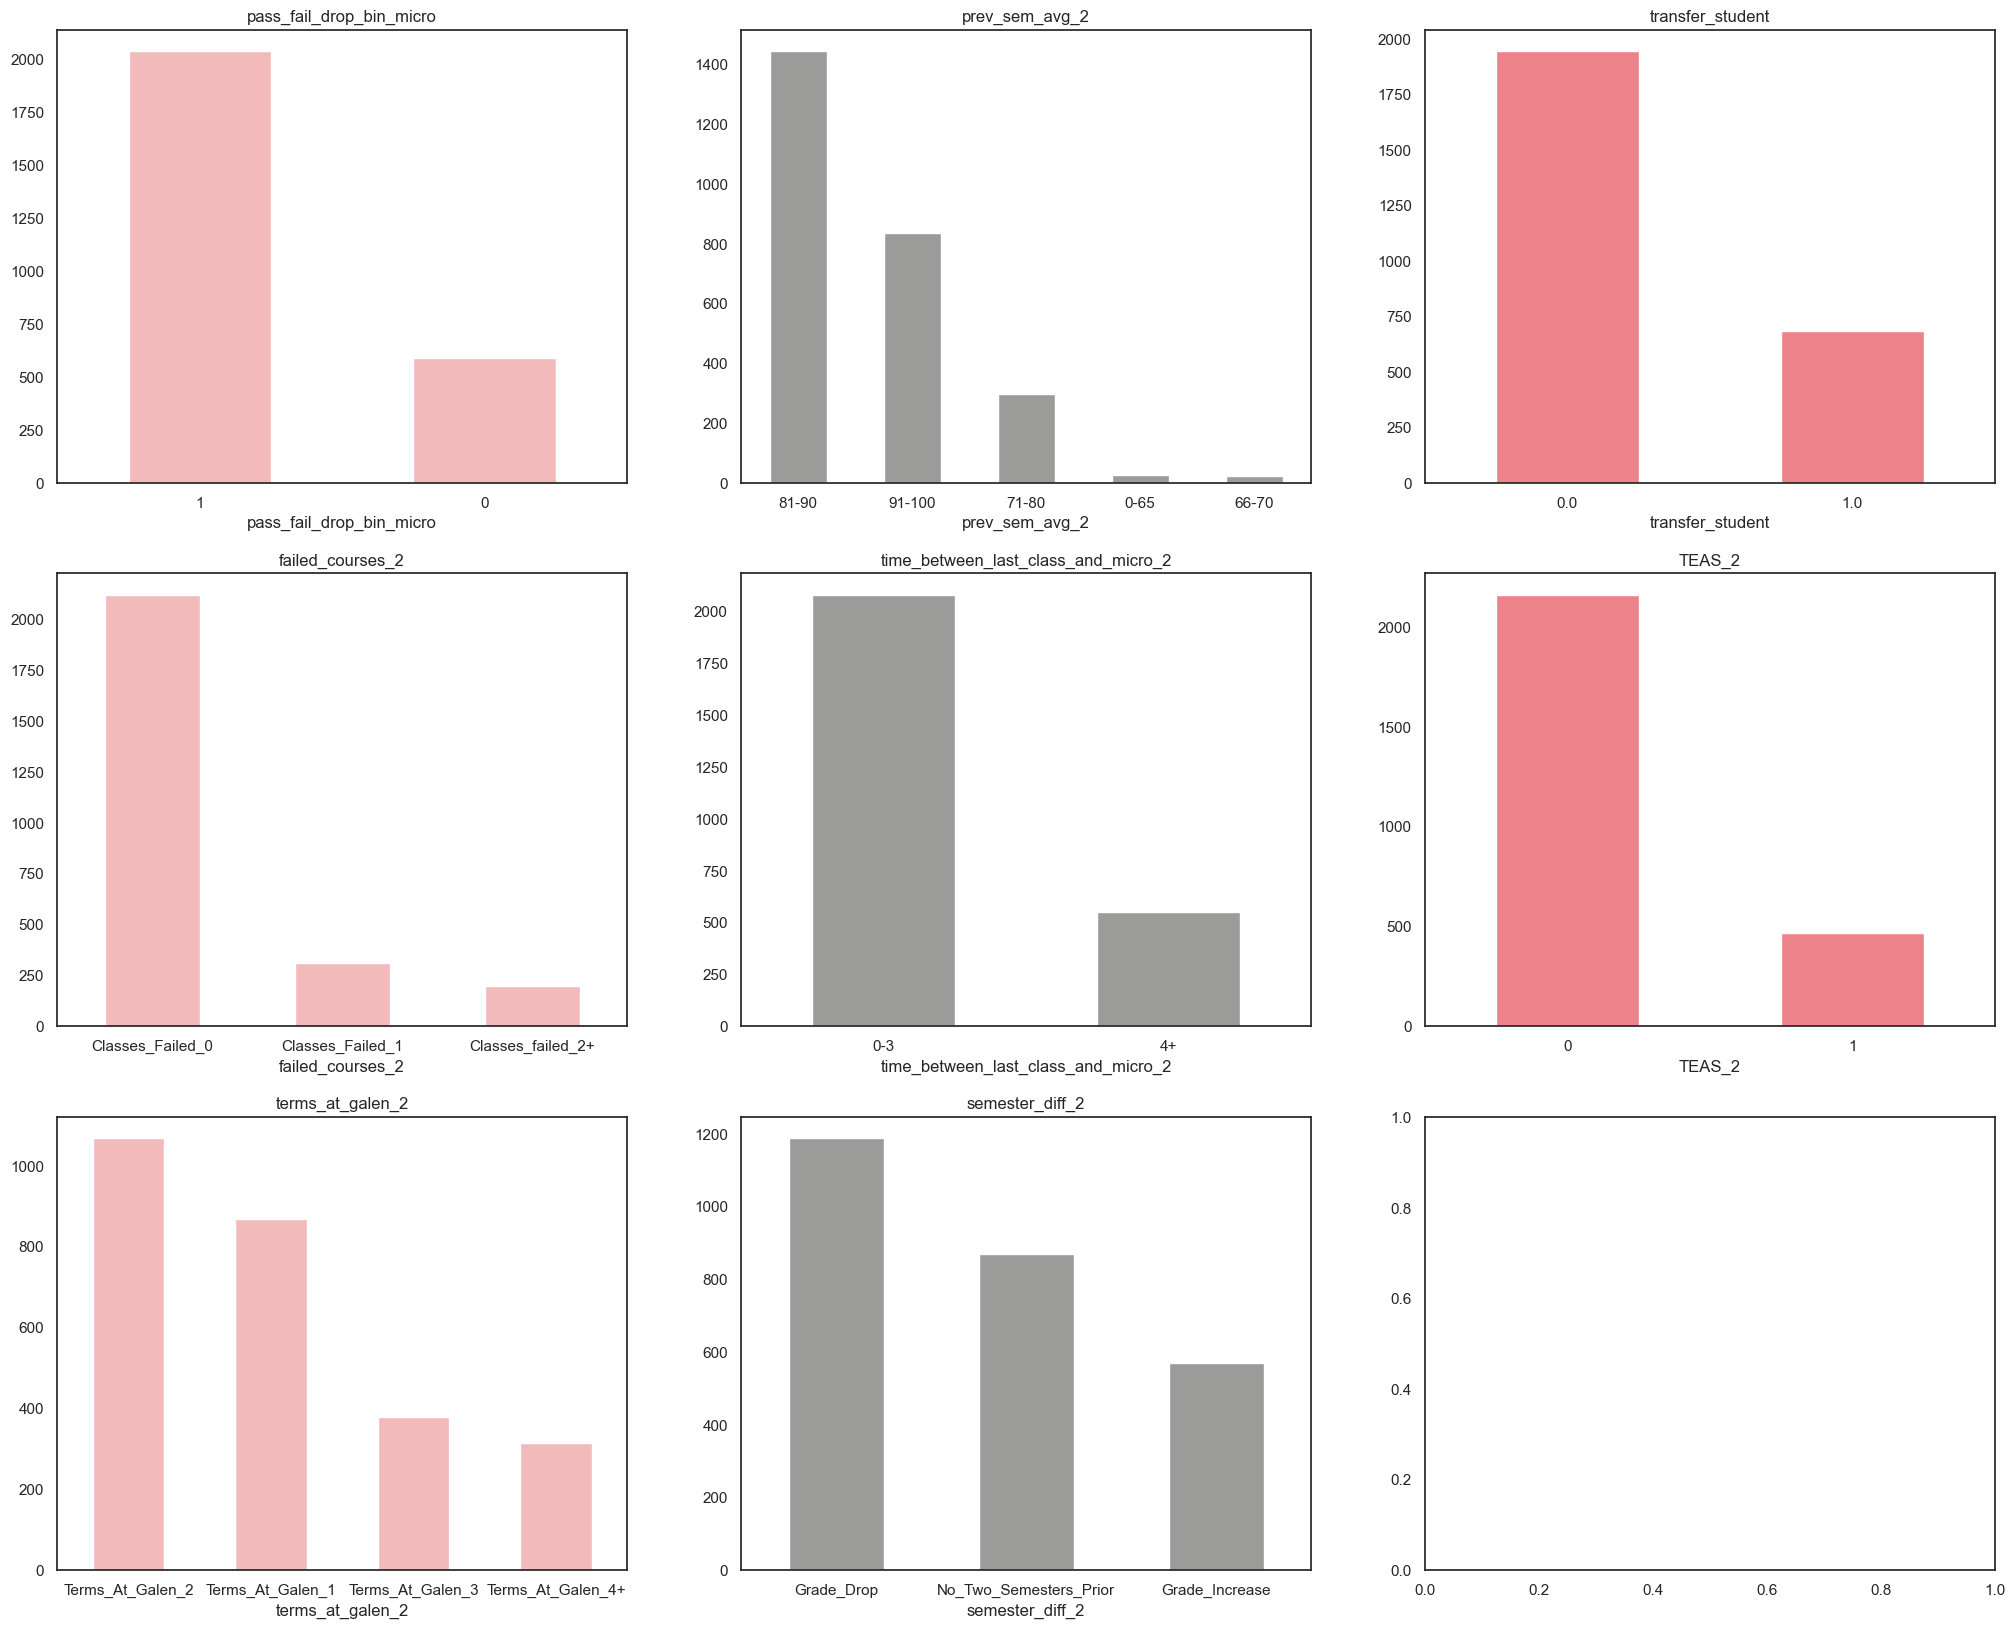

In [38]:

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (25,20))
for i, item in enumerate(cat_list):
    if i < 3:
        ax = df2[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = df2[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = df2[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

### Step 8: Visualizing Target Variable Distribution Among Features

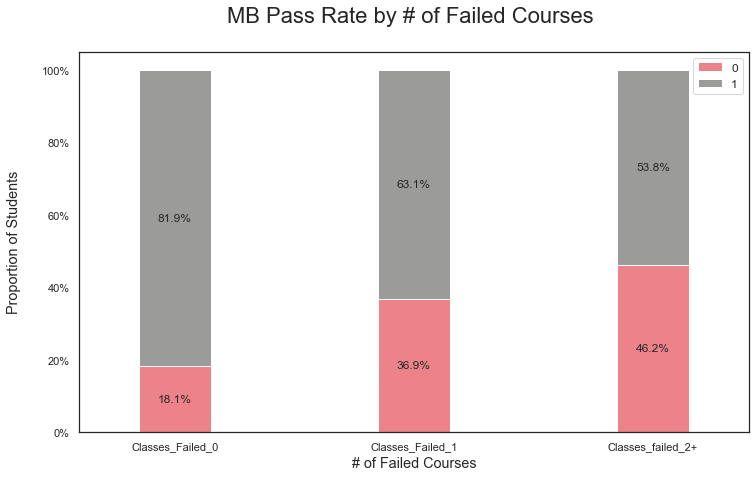

In [317]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['failed_courses_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('# of Failed Courses\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by # of Failed Courses \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


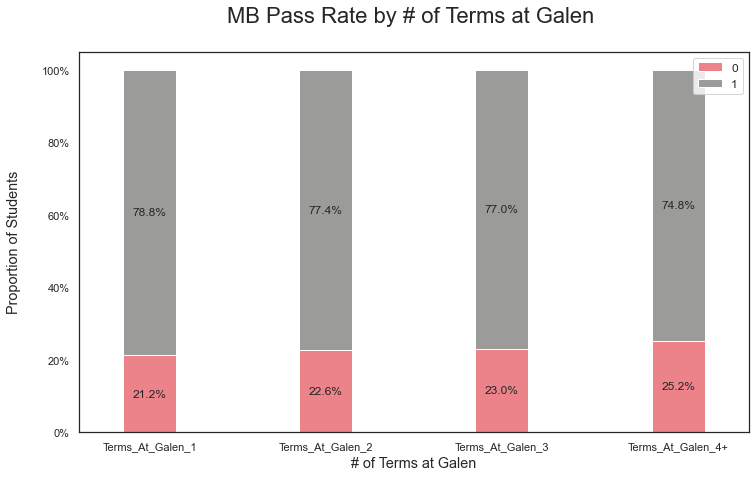

In [318]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['terms_at_galen_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('# of Terms at Galen\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by # of Terms at Galen \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


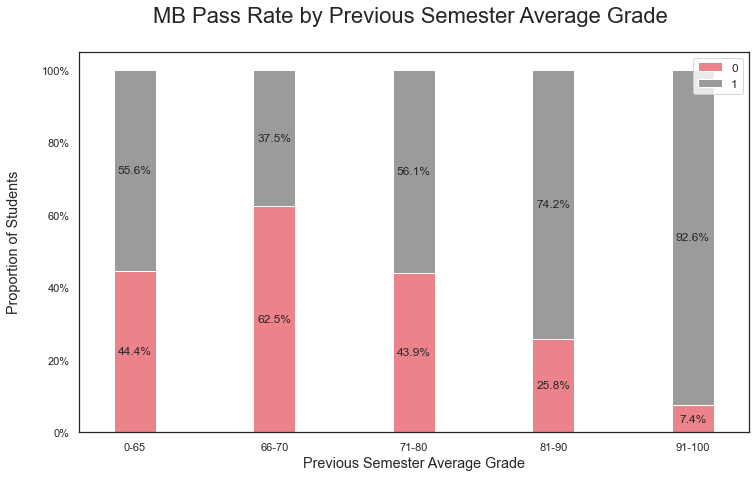

In [319]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['prev_sem_avg_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Previous Semester Average Grade\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Previous Semester Average Grade \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


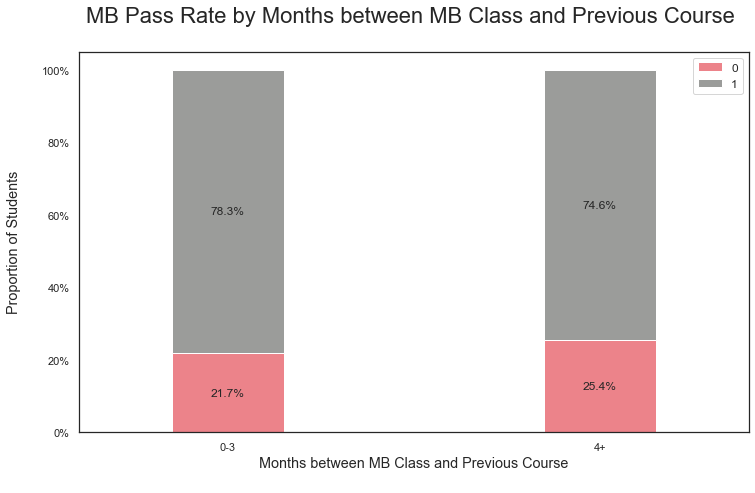

In [320]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['time_between_last_class_and_micro_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Months between MB Class and Previous Course\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Months between MB Class and Previous Course \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


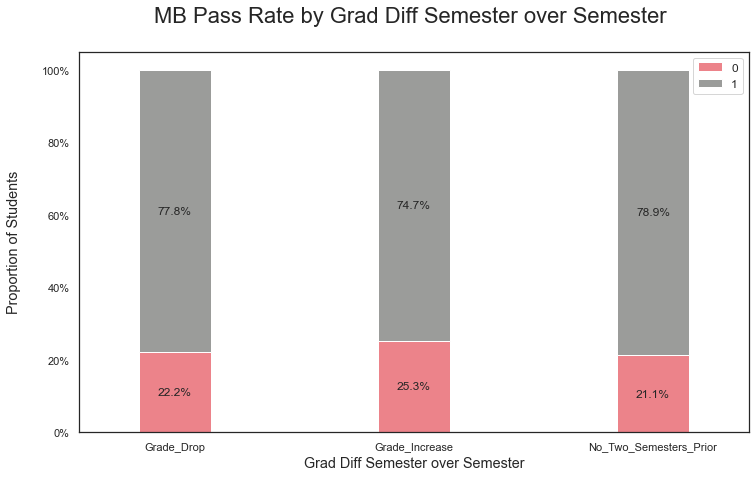

In [321]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['semester_diff_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Grad Diff Semester over Semester\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Grad Diff Semester over Semester \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


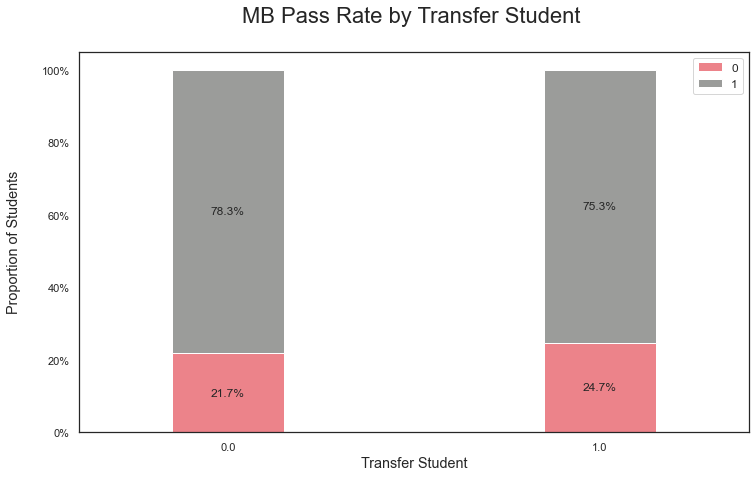

In [322]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['transfer_student','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Transfer Student\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Transfer Student \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


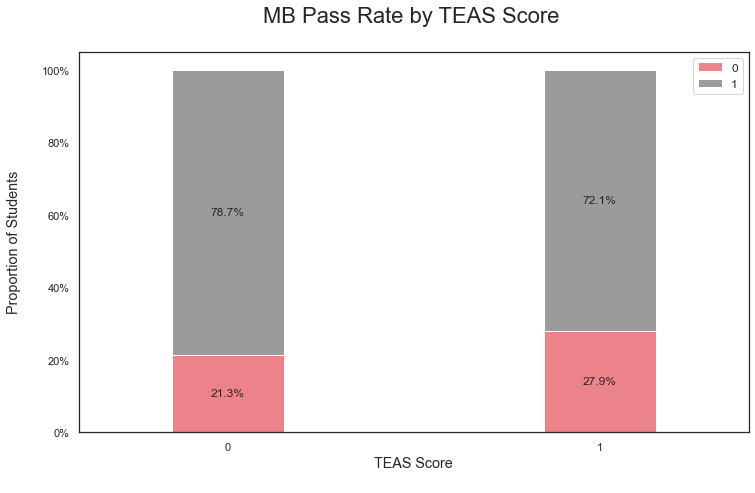

In [323]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['TEAS_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('TEAS Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by TEAS Score \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


### Step 9: One Hot Encoding

In [39]:
cat_list

['pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']

In [48]:
df3 = df2[['StudentID','pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']]

In [50]:
df3.columns = df3.columns.str.replace('_2', '')
df3.time_between_last_class_and_micro = np.where(df3.time_between_last_class_and_micro=='0-3',1,0)


C:\Users\tleer\AppData\Local\Temp\ipykernel_3300\3260975878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.time_between_last_class_and_micro = np.where(df3.time_between_last_class_and_micro=='0-3',1,0)


In [51]:
df3.head()

,StudentID,pass_fail_drop_bin_micro,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,semester_diff,transfer_student,TEAS
0,1,1,Classes_failed_2+,Terms_At_Galen_2,81-90,0,Grade_Increase,1.0,0
1,2,1,Classes_Failed_0,Terms_At_Galen_2,91-100,0,Grade_Increase,0.0,0
2,3,0,Classes_Failed_1,Terms_At_Galen_3,81-90,0,Grade_Increase,0.0,0
3,4,1,Classes_Failed_0,Terms_At_Galen_2,91-100,0,Grade_Drop,0.0,0
4,5,0,Classes_Failed_0,Terms_At_Galen_1,81-90,0,No_Two_Semesters_Prior,1.0,0


In [52]:
df3.nunique()

StudentID                            2627
pass_fail_drop_bin_micro                2
failed_courses                          3
terms_at_galen                          4
prev_sem_avg                            5
time_between_last_class_and_micro       1
semester_diff                           3
transfer_student                        2
TEAS                                    2
dtype: int64

In [53]:
OHE = ['failed_courses','terms_at_galen','prev_sem_avg','semester_diff']

In [54]:
dataset3a = pd.get_dummies(data=df3, columns=[col for col in df3.columns if col in OHE], drop_first=True)
dataset3b = pd.get_dummies(data=df3, columns=[col for col in df3.columns if col in OHE])

In [55]:
dataset3a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 0 to 2629
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   StudentID                             2627 non-null   object 
 1   pass_fail_drop_bin_micro              2627 non-null   object 
 2   time_between_last_class_and_micro     2627 non-null   int32  
 3   transfer_student                      2627 non-null   float64
 4   TEAS                                  2627 non-null   object 
 5   failed_courses_Classes_Failed_1       2627 non-null   bool   
 6   failed_courses_Classes_failed_2+      2627 non-null   bool   
 7   terms_at_galen_Terms_At_Galen_2       2627 non-null   bool   
 8   terms_at_galen_Terms_At_Galen_3       2627 non-null   bool   
 9   terms_at_galen_Terms_At_Galen_4+      2627 non-null   bool   
 10  prev_sem_avg_66-70                    2627 non-null   bool   
 11  prev_sem_avg_71-80    

In [56]:
## Used to see which values are being dropped in the process.
dataset3b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 0 to 2629
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   StudentID                             2627 non-null   object 
 1   pass_fail_drop_bin_micro              2627 non-null   object 
 2   time_between_last_class_and_micro     2627 non-null   int32  
 3   transfer_student                      2627 non-null   float64
 4   TEAS                                  2627 non-null   object 
 5   failed_courses_Classes_Failed_0       2627 non-null   bool   
 6   failed_courses_Classes_Failed_1       2627 non-null   bool   
 7   failed_courses_Classes_failed_2+      2627 non-null   bool   
 8   terms_at_galen_Terms_At_Galen_1       2627 non-null   bool   
 9   terms_at_galen_Terms_At_Galen_2       2627 non-null   bool   
 10  terms_at_galen_Terms_At_Galen_3       2627 non-null   bool   
 11  terms_at_galen_Terms_A

### Step 10: Creating LR Model and Testing Accuracy

In [57]:
response = dataset3a["pass_fail_drop_bin_micro"]

dataset = dataset3a.drop(columns="pass_fail_drop_bin_micro")


In [60]:
## In this case, the person who made this code believes that using this "stratify" method can resolve class imbalance

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#He made sure that there was a proportional split when he uses stratify here. 
#Versus SMOTE where we're creating fake data. 
#In this case, since we have a decent customer size for both, no need for SMOTE.
#In the test split, there should be about 80 percent of the customers you keep and others that leave. 
#The stratify makes sure to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2101, 15)
Number transactions y_train dataset:  (2101,)
Number transactions X_test dataset:  (526, 15)
Number transactions y_test dataset:  (526,)


In [61]:
train_identity = X_train['StudentID']
X_train = X_train.drop(columns = ['StudentID'])

test_identity = X_test['StudentID']
X_test = X_test.drop(columns = ['StudentID'])


In [62]:
## Use this to scale your Independent Variables before Prediction

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [63]:
y_test

2436    0
1515    1
2046    1
1098    1
1748    0
       ..
401     1
2020    1
1926    1
2366    1
2397    1
Name: pass_fail_drop_bin_micro, Length: 526, dtype: object

In [64]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred, pos_label='1' )
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')
f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label='1')

In [65]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred, pos_label='1' )
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')
f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label='1')

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)


                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.764259   0.788618  0.95098  0.862222  0.913371


In [66]:
#probability score
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

In [67]:

# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.78 (+/- 0.01)


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

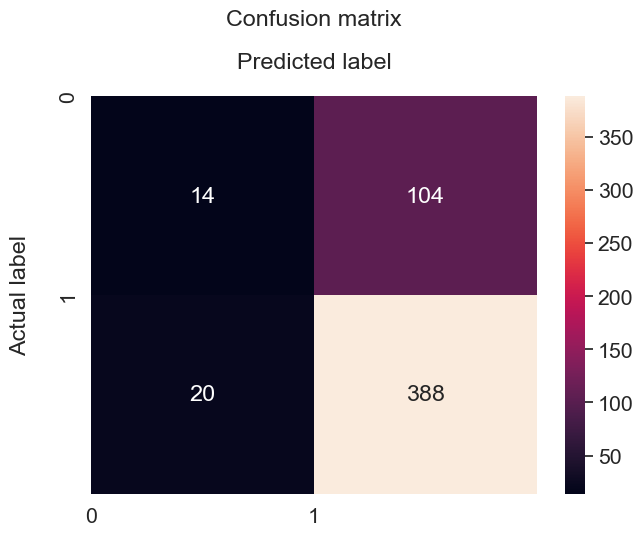

In [69]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


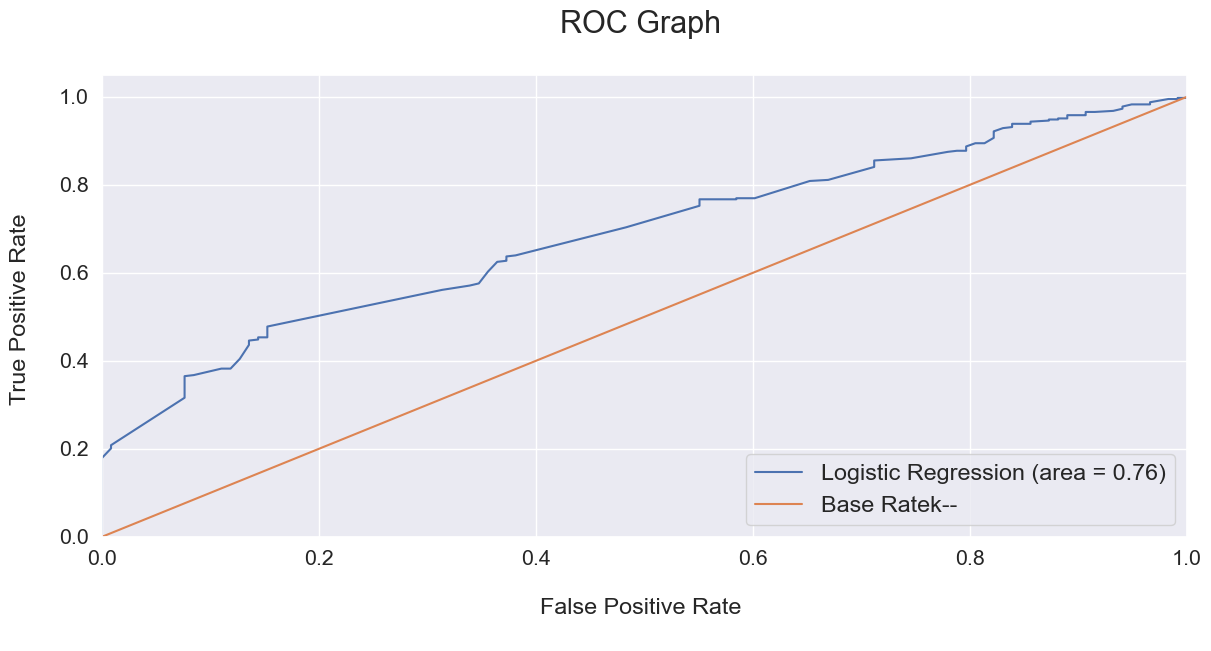

In [70]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1], pos_label='1' )
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


### Step 11: Feature Importance

In [72]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'StudentID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)


,features,coef
11,prev_sem_avg_91-100,1.024154
10,prev_sem_avg_81-90,0.321955
6,terms_at_galen_Terms_At_Galen_3,0.175617
7,terms_at_galen_Terms_At_Galen_4+,0.144649
0,time_between_last_class_and_micro,0.000000
5,terms_at_galen_Terms_At_Galen_2,-0.022641
8,prev_sem_avg_66-70,-0.065078
9,prev_sem_avg_71-80,-0.072614
1,transfer_student,-0.092096
2,TEAS,-0.107973


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 0 to 2629
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   StudentID                          2627 non-null   object 
 1   pass_fail_drop_bin_micro           2627 non-null   object 
 2   failed_courses                     2627 non-null   object 
 3   terms_at_galen                     2627 non-null   object 
 4   prev_sem_avg                       2627 non-null   object 
 5   time_between_last_class_and_micro  2627 non-null   int32  
 6   semester_diff                      2627 non-null   object 
 7   transfer_student                   2627 non-null   float64
 8   TEAS                               2627 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 195.0+ KB


In [74]:
y_pred_probs

array([0.73258732, 0.6740159 , 0.8027768 , 0.71779218, 0.8027768 ,
       0.51515776, 0.91286403, 0.90720014, 0.47182071, 0.47632973,
       0.8027768 , 0.67011704, 0.92832916, 0.73258732, 0.8027768 ,
       0.72910745, 0.92832916, 0.91286403, 0.8027768 , 0.81558669,
       0.87547604, 0.88772719, 0.70757527, 0.91286403, 0.73258732,
       0.87547604, 0.73642769, 0.62697581, 0.72910745, 0.6740159 ,
       0.42936981, 0.90720014, 0.95060519, 0.88772719, 0.76701914,
       0.91286403, 0.8699334 , 0.91286403, 0.92714317, 0.91286403,
       0.62697581, 0.75442551, 0.8027768 , 0.91286403, 0.87547604,
       0.95648422, 0.57800607, 0.95060519, 0.76701914, 0.91144655,
       0.8699334 , 0.91286403, 0.75442551, 0.73258732, 0.91286403,
       0.73258732, 0.91286403, 0.8027768 , 0.8027768 , 0.65749523,
       0.73258732, 0.95060519, 0.90570003, 0.68903342, 0.72910745,
       0.62968225, 0.41098461, 0.92832916, 0.91286403, 0.6740159 ,
       0.95060519, 0.41098461, 0.91286403, 0.7459984 , 0.68523

### Step 12: Format Final Results

In [78]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["likely_to_pass(%)"] = y_pred_probs 

final_results["likely_to_pass(%)"] = final_results["likely_to_pass(%)"]*100

final_results["likely_to_pass(%)"]=final_results["likely_to_pass(%)"].round(2)

final_results = final_results[['StudentID', 'pass_fail_drop_bin_micro', 'predictions', 'likely_to_pass(%)']]

final_results ['Ranking'] = pd.qcut(final_results['likely_to_pass(%)'].rank(method = 'first'),10,labels=range(10,0,-1))


final_results = final_results.sort_values(by='Ranking', ascending=False)
print (final_results)


     StudentID pass_fail_drop_bin_micro predictions  likely_to_pass(%) Ranking
142        143                        1           1              97.08       1
1890      1891                        1           1              95.65       1
2539      2540                        1           1              93.96       1
2619      2620                        1           1              95.06       1
1697      1698                        1           1              92.83       1
...        ...                      ...         ...                ...     ...
818        819                        0           0              48.11      10
1633      1634                        0           1              52.64      10
518        519                        1           1              57.90      10
953        954                        0           0              38.50      10
536        537                        1           0              27.30      10

[526 rows x 5 columns]


In [80]:
final_results[final_results["Ranking"]==10].head()

,StudentID,pass_fail_drop_bin_micro,predictions,likely_to_pass(%),Ranking
597,598,0,0,43.12,10
923,924,0,1,58.98,10
215,216,1,0,48.19,10
1121,1122,1,0,42.94,10
792,793,1,0,43.12,10


In [81]:
dataset3a.head()

,StudentID,pass_fail_drop_bin_micro,time_between_last_class_and_micro,transfer_student,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior
0,1,1,0,1.0,0,False,True,True,False,False,False,False,True,False,True,False
1,2,1,0,0.0,0,False,False,True,False,False,False,False,False,True,True,False
2,3,0,0,0.0,0,True,False,False,True,False,False,False,True,False,True,False
3,4,1,0,0.0,0,False,False,True,False,False,False,False,False,True,False,False
4,5,0,0,1.0,0,False,False,False,False,False,False,False,True,False,False,True


In [82]:
new_df = pd.merge(dataset3a, final_results, on=['StudentID', 'pass_fail_drop_bin_micro'], how='inner')

In [83]:
new_df.head()

,StudentID,pass_fail_drop_bin_micro,time_between_last_class_and_micro,transfer_student,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior,predictions,likely_to_pass(%),Ranking
0,1,1,0,1.0,0,False,True,True,False,False,False,False,True,False,True,False,0,47.18,10
1,10,1,0,0.0,0,False,False,True,False,False,False,False,True,False,False,False,1,80.28,5
2,16,1,0,0.0,0,False,False,True,False,False,False,False,True,False,False,False,1,80.28,5
3,25,1,0,1.0,0,False,False,False,False,False,False,False,False,True,False,True,1,91.29,3
4,33,1,0,0.0,0,False,False,True,False,False,False,False,False,True,False,False,1,95.06,1


In [94]:
print("# of Students Predicted to Not Pass:",len(new_df[new_df.predictions=='0']))
print("# of Students Correctly Predicted Not to Pass:",len(new_df[(new_df.predictions=='0')&(new_df.pass_fail_drop_bin_micro=='0')]))
print("# of Students Incorrectly Predicted Not to Pass:",len(new_df[(new_df.predictions=='0')&(new_df.pass_fail_drop_bin_micro=='1')]))
print("With a success rate of 41%, this model performs poorly at predicting who will not pass")
print("")
print("# of Students Predicted to Pass:",len(new_df[new_df.predictions=='1']))
print("# of Students Correctly Predicted to Pass:",len(new_df[(new_df.predictions=='1')&(new_df.pass_fail_drop_bin_micro=='1')]))
print("# of Students Incorrectly Predicted to Pass:",len(new_df[(new_df.predictions=='1')&(new_df.pass_fail_drop_bin_micro=='0')]))
print("With a success rate of 79%, this model performs well at predicting who will pass")


# of Students Predicted to Not Pass: 34
# of Students Correctly Predicted Not to Pass: 14
# of Students Incorrectly Predicted Not to Pass: 20
With a success rate of 41%, this model performs poorly at predicting who will not pass

# of Students Predicted to Pass: 492
# of Students Correctly Predicted to Pass: 388
# of Students Incorrectly Predicted to Pass: 104
With a success rate of 79%, this model performs well at predicting who will pass


In [96]:
import pickle
pickle.dump(classifier, open('model_2.pkl', 'wb'))

----------

### Step 13: Applying Classifier to New Dataset

In [109]:
df_score = pd.read_excel(f'{path}/Data/data_science_candidate_score_file.xlsx')
df_score['StudentID'] = df_score['StudentID'].astype(str)

df_score['semester_diff_test']=np.where(df_score['semester_diff'].isna(),0,df_score['prev_sem_avg'] - df_score['two_sem_prior_avg'])
df_score['teas_test']=np.where(df_score['TEAS'].isna(),0,1)

cat_list = df_score.select_dtypes(include=object).columns.tolist()
num_list = df_score.select_dtypes(include=np.number).columns.tolist()

df_score = df_score[[
                #'total_avg',
                'StudentID',
               #'pass_fail_drop_bin_micro',
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff'
               ,'TEAS'

            ]]

#df1["total_avg_2"] = np.where(df1["total_avg"].isnull(),"Not_Included",
#                              np.where(df1["total_avg"]<=65,"0-65",
#                              np.where(df1["total_avg"]<=70,"66-70",
#                              np.where(df1["total_avg"]<=80,"71-80",
#                              np.where(df1["total_avg"]<=90,"81-90","91-100"
#                                      )))))

df_score["failed_courses_2"] = np.where(df_score["failed_courses"].isnull(),"Not_Included",
                              np.where(df_score["failed_courses"]==0,"Classes_Failed_0",
                              np.where(df_score["failed_courses"]==1,"Classes_Failed_1","Classes_failed_2+"
                                      )))

df_score["terms_at_galen_2"] = np.where(df_score["terms_at_galen"].isnull(),"Not_Included",
                              np.where(df_score["terms_at_galen"]==1,"Terms_At_Galen_1",
                              np.where(df_score["terms_at_galen"]==2,"Terms_At_Galen_2",
                              np.where(df_score["terms_at_galen"]==3,"Terms_At_Galen_3","Terms_At_Galen_4+"
                                      ))))


df_score["prev_sem_avg_2"] = np.where(df_score["prev_sem_avg"].isnull(),"Not_Included",
                              np.where(df_score["prev_sem_avg"]<=65,"0-65",
                              np.where(df_score["prev_sem_avg"]<=70,"66-70",
                              np.where(df_score["prev_sem_avg"]<=80,"71-80",
                              np.where(df_score["prev_sem_avg"]<=90,"81-90","91-100"
                                      )))))

df_score["time_between_last_class_and_micro_2"] = np.where(df_score["time_between_last_class_and_micro"].isnull(),"Not_Included",
                                                  np.where(df_score["time_between_last_class_and_micro"]<=3,"0-3","4+"
                                                  ))


#df1["two_sem_prior_avg_2"] = np.where(df1["two_sem_prior_avg"].isnull(),"Not_Included",
#                              np.where(df1["two_sem_prior_avg"]<=65,"0-65",
#                              np.where(df1["two_sem_prior_avg"]<=70,"66-70",
#                              np.where(df1["two_sem_prior_avg"]<=80,"71-80",
#                              np.where(df1["two_sem_prior_avg"]<=90,"81-90","91-100"
#                                      )))))


df_score["semester_diff_2"] = np.where(df_score["semester_diff"].isnull(),"No_Two_Semesters_Prior",
                              #np.where(df1["semester_diff"]<=-10,"Less_than_-10",
                              #np.where(df1["semester_diff"]<=0,"-9_0",
                              #np.where(df1["semester_diff"]<=10,"0_10","11+"
                              np.where(df_score["semester_diff"]<=0,"Grade_Drop",
                              np.where(df_score["semester_diff"]==0,"No_Grade_Change","Grade_Increase"                                 
                                      )))

#df1["TEAS_2"] = np.where(df1["TEAS"].isnull(),"Not_Included",
#                              np.where(df1["semester_diff"]<=68,"Less_than_Avg_68","Better_than_Avg_68"
#                                      ))

df_score["TEAS_2"] = np.where(df_score["TEAS"].isnull(),0,1)

df_score.transfer_student = df_score.transfer_student.astype(str)
df_score.TEAS_2 = df_score.TEAS_2.astype(str)

cat_list = df_score.select_dtypes(include=object).columns.tolist()


cat_list =  [
    #'pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'TEAS_2']

df_score = df_score[['StudentID',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']]

df_score.columns = df_score.columns.str.replace('_2', '')
df_score.time_between_last_class_and_micro = np.where(df_score.time_between_last_class_and_micro=='0-3',1,0)

OHE = ['failed_courses','terms_at_galen','prev_sem_avg','semester_diff']
dataset3a_score = pd.get_dummies(data=df_score, columns=[col for col in df_score.columns if col in OHE], drop_first=True)
dataset3b_score = pd.get_dummies(data=df_score, columns=[col for col in df_score.columns if col in OHE])

#dataset_score = dataset3a_score.drop(columns="StudentID")
test_identity_score = dataset3a_score['StudentID']
dataset3a_score = dataset3a_score.drop(columns = ['StudentID'])

In [112]:
sc_X = StandardScaler()
dataset_score2 = pd.DataFrame(sc_X.fit_transform(dataset3a_score))
dataset_score2.columns = dataset3a_score.columns.values
dataset_score2.index = dataset3a_score.index.values
dataset3a_score = dataset_score2

model = pickle.load(open('model_2.pkl','rb'))
y_pred_2 = model.predict(dataset3a_score)
y_pred_probs_score = classifier.predict_proba(dataset3a_score)
y_pred_probs_score  = y_pred_probs_score [:, 1]

In [114]:
final_results_score = pd.concat([test_identity_score, dataset3a_score], axis = 1).dropna()
final_results_score['predictions'] = y_pred_2
final_results_score["likely_to_pass(%)"] = y_pred_probs_score 
final_results_score["likely_to_pass(%)"] = final_results_score["likely_to_pass(%)"]*100
final_results_score["likely_to_pass(%)"] = final_results_score["likely_to_pass(%)"].round(2)

final_results_score = final_results_score[['StudentID', 'predictions', 'likely_to_pass(%)']]
final_results_score['Ranking'] = pd.qcut(final_results_score['likely_to_pass(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results_score = final_results_score#.sort_values(by='StudentID', ascending=True)
print (final_results_score)

In [126]:
df_final = pd.read_excel(f'{path}/Data/data_science_candidate_score_file.xlsx')
df_final.StudentID = df_final.StudentID.astype(str)
#final_results_score_2 = final_results_score.iloc[:,:2]

final_results_score['predictions'] = np.where(final_results_score['predictions']=='1','Pass','Fail')
df_final_score_file = pd.merge(final_results_score, df_final, on=['StudentID'], how='inner')

In [130]:
df_final_score_file.head()

,StudentID,predictions,likely_to_pass(%),Ranking,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
0,1,Pass,91.31,3,92.940000,0,1,92.94,3,NaN,NaN,1,NaN
1,2,Pass,62.09,9,85.536364,1,3,75.70,3,80.80,-5.10,0,NaN
2,3,Pass,77.00,6,88.542857,0,2,88.00,3,88.95,-0.95,1,NaN
3,4,Pass,69.60,8,88.380000,0,1,88.38,3,NaN,NaN,1,NaN
4,5,Pass,94.90,1,91.910000,0,2,90.64,3,93.18,-2.54,0,NaN


In [590]:
df_final_score_file.to_excel("Final_Score_File.xlsx")